In [3]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [4]:
dataFrame= pd.read_excel("merc.xlsx")



In [5]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [6]:
#ben verimde ne var ne yok görmek isterim en başta.

dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [7]:
#hiç null var mı ? otomatik rakamla doldurma veya raw'ları silme işlemi var önümüzde.

dataFrame.isnull().sum() #summary özet demek ! 

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<Figure size 504x360 with 0 Axes>

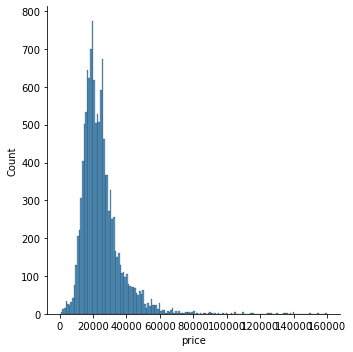

In [8]:
plt.figure(figsize=(7,5))
sbn.displot(dataFrame["price"]) #distrubiton plot nasıl dağıldığını göster.

c:\Users\yusuf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

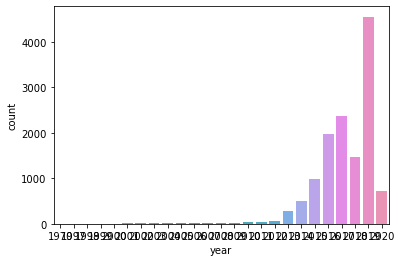

In [9]:
#yukarıdaki grafikteki uç kısımları çok az olduğu ve eğitimde sapmalar yaşacatağı için çıkarıcam.

sbn.countplot(dataFrame["year"]) #countplot bana kaç yılda kaç tane olduğunu sayısını göster diyorum.


In [10]:
#şimdi de kolerasyonunu görelim. Fiyatın(price) diğer değişkenlerle ilişkisi

dataFrame.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [11]:
dataFrame.corr()["price"].sort_values() #burada sadece istediğimiz kolon çekiyor ayrıca .sort_values() sayesinde küçükten büyüğe doğru da sıralıyor. en çok etkileyen- en büyük olan

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

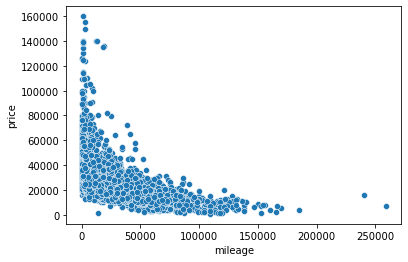

In [12]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame)  #negatif bir kolerasyonla denedik.

In [13]:
dataFrame["transmission"].describe()

count         13119
unique            4
top       Semi-Auto
freq           6848
Name: transmission, dtype: object

In [14]:
dataFrame.sort_values("price",ascending=True).head(20) #ascending(yükselen)= False ? En yüksek değeri en yukarı getirecek. head'ten yardım alıcam (20) yazıcam

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [15]:
#uç noktadaki %1'lik kısmı çıkar.(modeli etkilemez.) onu da şöyle buluruz.

len(dataFrame)

#%1'lik kısım
len(dataFrame) *0.01

131.19

## VERİ TEMİZLİĞİ

In [16]:
YeniDataFrame=dataFrame.sort_values("price",ascending=False).iloc[131:] #iloc==indexLocation

In [17]:
YeniDataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


c:\Users\yusuf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

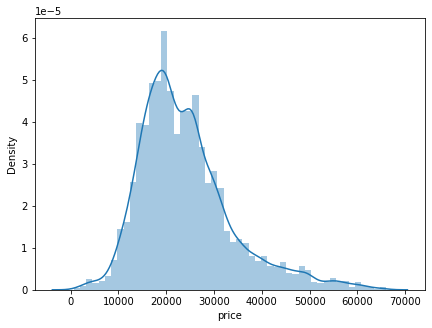

In [18]:
plt.figure(figsize=(7,5))
sbn.distplot(YeniDataFrame["price"])

In [19]:
dataFrame.groupby("year").mean()["price"] #burada year'ları gruplarıyıp fiyatlara göre ortalamasını alıyor.

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [20]:
YeniDataFrame.groupby("year").mean()["price"] #hala 1970 yılındaki verilerin  soru çıkardığını düşünüyoruz. ondan kurtulmamız gerek.

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [21]:
dataFrame[dataFrame.year !=1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [22]:
dataFrame=YeniDataFrame

In [23]:
dataFrame=dataFrame[dataFrame.year !=1970 ] 

In [24]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [25]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


## MODEL OLUŞTURMA


In [26]:
#şimdi benim y ve x'lere bağlı x_train,y_train ve y_test ,x_test şeklinde ayırmam gerekiyor. hedefim olan y yani price geri kalan hepsi benim için x yani (features== özellik ) oluyor.

y=dataFrame["price"].values

x=dataFrame.drop("price",axis=1).values

In [27]:
y #bana böyle bir dizi verecektir.


array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

#bu işlemi gerçekleştirdikten sonra doğru bölündü mü diye bakıyorum;

In [30]:
len(x_test)

4286

In [31]:
len(x_train)

8701

In [32]:
len(y_test)

4286

In [33]:
len(y_train)

8701

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler= MinMaxScaler() #büyütme ve küçültme işlemleri yapıyoruz scaler ile isteğimiz ise 0-1 arasına getirmek bütün değerleri

In [36]:
x_train= scaler.fit_transform(x_train)

ValueError: could not convert string to float: 'Semi-Auto'

In [ ]:
x_test=scaler.fit_transform(x_test)

In [ ]:
#ulaşmak istediğimiz y'leri scaler etmemize gerek yok.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x_train.shape

(8701, 5)

In [ ]:
model=Sequential() #ana fonksiyon

model.add(Dense(10,activation="relu")) #şimdi katmanlar eklicez.
model.add(Dense(10,activation="relu")) #şimdi katmanlar eklicez.
model.add(Dense(10,activation="relu")) #şimdi katmanlar eklicez.
model.add(Dense(10,activation="relu")) #şimdi katmanlar eklicez.
model.add(Dense(10,activation="relu")) #şimdi katmanlar eklicez.

#çıkış katmanı 

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [ ]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=213,epochs=277) #validation_data(x_test,y_test) bunları bizim yerimize ya da  kıyaslama da yardımcı oluyor veyahut değerlendiriyor.

Epoch 1/277
41/41 [==============================] - 1s 9ms/step - loss: 676539072.0000 - val_loss: 677726720.0000
Epoch 2/277
41/41 [==============================] - 0s 3ms/step - loss: 676500864.0000 - val_loss: 677646400.0000
Epoch 3/277
41/41 [==============================] - 0s 4ms/step - loss: 676293376.0000 - val_loss: 677209472.0000
Epoch 4/277
41/41 [==============================] - 0s 3ms/step - loss: 675199936.0000 - val_loss: 675016640.0000
Epoch 5/277
41/41 [==============================] - 0s 4ms/step - loss: 670348800.0000 - val_loss: 666144512.0000
Epoch 6/277
41/41 [==============================] - 0s 3ms/step - loss: 653378944.0000 - val_loss: 637925568.0000
Epoch 7/277
41/41 [==============================] - 0s 4ms/step - loss: 606180928.0000 - val_loss: 566583424.0000
Epoch 8/277
41/41 [==============================] - 0s 4ms/step - loss: 501288096.0000 - val_loss: 426396928.0000
Epoch 9/277
41/41 [==============================] - 0s 4ms/step - loss: 3302796

In [ ]:
kayipVerisi= pd.DataFrame(model.history.history)

In [ ]:
kayipVerisi

,loss,val_loss
0,676539072.0,677726720.0
1,676500864.0,677646400.0
2,676293376.0,677209472.0
3,675199936.0,675016640.0
4,670348800.0,666144512.0
...,...,...
272,17922332.0,19912810.0
273,17990658.0,19856552.0
274,17965188.0,19909728.0
275,17951996.0,19970444.0


<AxesSubplot:>

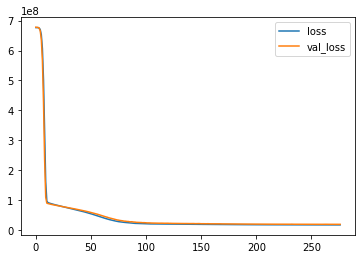

In [ ]:
kayipVerisi.plot() #eğer epochs 1000-2000 olursa overfitting olur.ayrıca loss ve val_loos aynı olması lazım.

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
tahminDizisi= model.predict(x_test)

In [ ]:
tahminDizisi

array([[24778.014],
       [21671.332],
       [15429.699],
       ...,
       [29194.174],
       [29245.064],
       [ 6524.57 ]], dtype=float32)

In [ ]:
mean_absolute_error(y_test,tahminDizisi) #3172.1076184585727 şu kadarlık bir fark var aralarında. gayet iyi aslında neye göre iyi, fiyatlar açısından 

3172.1076184585727

In [ ]:
# %13'lük bir fark mevcut = bunu daha optimize etmek için :


# 1-- Verimizi daha çok temizleyebiliriz.

# 2-- Test_size  değiştirebiliriz.

# 3-- Epoch sayımızı hatta katman sayımızı bile değiştirebiliriz (ki bunlar bizim hyper features'larımız direkt etki eden özelliklerimiz)

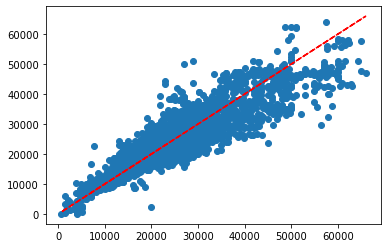

In [ ]:
plt.scatter(y_test,tahminDizisi) #regresyon'da bakıcak olursak fena değiliz. düzgün regresyon bulmuşuz. 
plt.plot(y_test,y_test,"r--")

In [ ]:
#mesela bir row'a göre değerlendirelim veriyi..

dataFrame.iloc[88]
#ben bunun price'ını çıkarıcam


NameError: name 'dataFrame' is not defined

In [ ]:
yeniArabaSeries=dataFrame.drop("price",axis=1).iloc[2]

NameError: name 'dataFrame' is not defined

In [ ]:
yeniArabaSeries

type(yeniArabaSeries)

pandas.core.series.Series

In [ ]:
yeniArabaSeries=scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [ ]:
model.predict(yeniArabaSeries) #tahmin etme işlemi

array([[60311.453]], dtype=float32)